# Task 6.5 - Unsupervised Machine Learning

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Display graphs without calling then

%matplotlib inline

In [3]:
#name the path
path = r'C:\Users\laura\Documents\Continuting Education\Career Foundry\Advanced Analytics and Dashboards\Data Analytics Dashboard Project'

In [4]:
#import the data file
df_cargo_3 = pd.read_csv(os.path.join(path, 'Data Files', 'edited', 'CD_2023_Cleaned_3.csv'))

In [8]:
#Per lesson 6.3 I will remove the outliers from the data frame.
# I will use that figure for this exercise. I have been using 1 standard deviation from the medium.
filtered_df = df_cargo_3[df_cargo_3['stolen_value'] < 2689377]

In [11]:
filtered_df.shape

(190112, 48)

In [64]:
# filter the data frame to columns of interest
# I am concerned that the amount of data will be too large for Python if I do not do this.
# Also the data has several extream outliers that will impact the analysis
unsupervised_df = unsupervised_df = filtered_df [['data_year', 'stolen_value','recovered_value' , 'is_prop_desc_auto', 'is_prop_desc_money', 'is_prop_desc_other', 'is_florida', 'is_indv_victim', 'is_public_victim', 'is_biz_victim']]

In [15]:
#make a copy for working with kmean clustering
unsupervised_df_2 = unsupervised_df.copy()


In [17]:
unsupervised_df_2.head()

,data_year,stolen_value,recovered_value,is_prop_desc_auto,is_prop_desc_money,is_prop_desc_other,is_florida,is_indv_victim,is_public_victim,is_biz_victim
0,2019,50,0,0,0,0,0,1,0,0
1,2012,120000,0,0,0,0,1,1,0,0
2,2012,120000,0,0,0,0,1,1,0,0
3,2012,2000,0,0,0,0,0,1,0,0
4,2020,663,0,0,0,0,1,0,0,1


## Q3- Utilize the elbow technique

In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [22]:
score = [kmeans[i].fit(unsupervised_df_2).score(unsupervised_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-530222320978502.75,
 -253139709989174.12,
 -164766597703088.53,
 -120029873034563.0,
 -97270743264695.58,
 -78229088994831.67,
 -70925295565932.11,
 -57108644829659.41,
 -39758915196533.98]

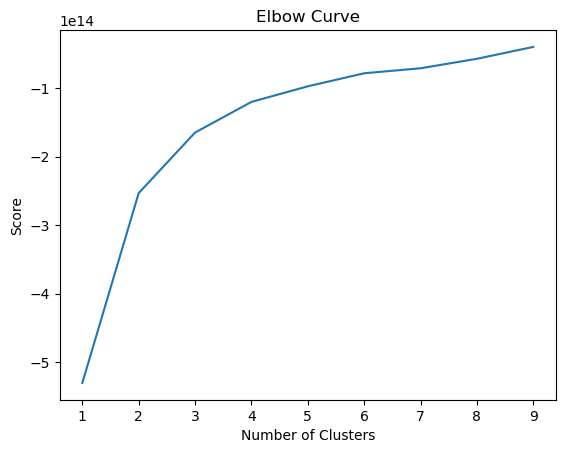

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Q4. How many clusters should you analyze?
It looks like there are four clusters available for analysis.

## Q5 Run the k-Means algorithm

In [28]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [30]:
# Fit the k-means object to the data.

kmeans.fit(unsupervised_df_2)

KMeans(n_clusters=4)

In [32]:
unsupervised_df_2['clusters'] = kmeans.fit_predict(unsupervised_df_2)

In [34]:
unsupervised_df_2.head()

,data_year,stolen_value,recovered_value,is_prop_desc_auto,is_prop_desc_money,is_prop_desc_other,is_florida,is_indv_victim,is_public_victim,is_biz_victim,clusters
0,2019,50,0,0,0,0,0,1,0,0,0
1,2012,120000,0,0,0,0,1,1,0,0,2
2,2012,120000,0,0,0,0,1,1,0,0,2
3,2012,2000,0,0,0,0,0,1,0,0,0
4,2020,663,0,0,0,0,1,0,0,1,0


In [36]:
#Cluster counts
unsupervised_df_2['clusters'].value_counts()

clusters
0    187750
2      2030
1       292
3        40
Name: count, dtype: int64

In [38]:
#assign the label to the cluster
unsupervised_df_2['clusters'] = kmeans.labels_

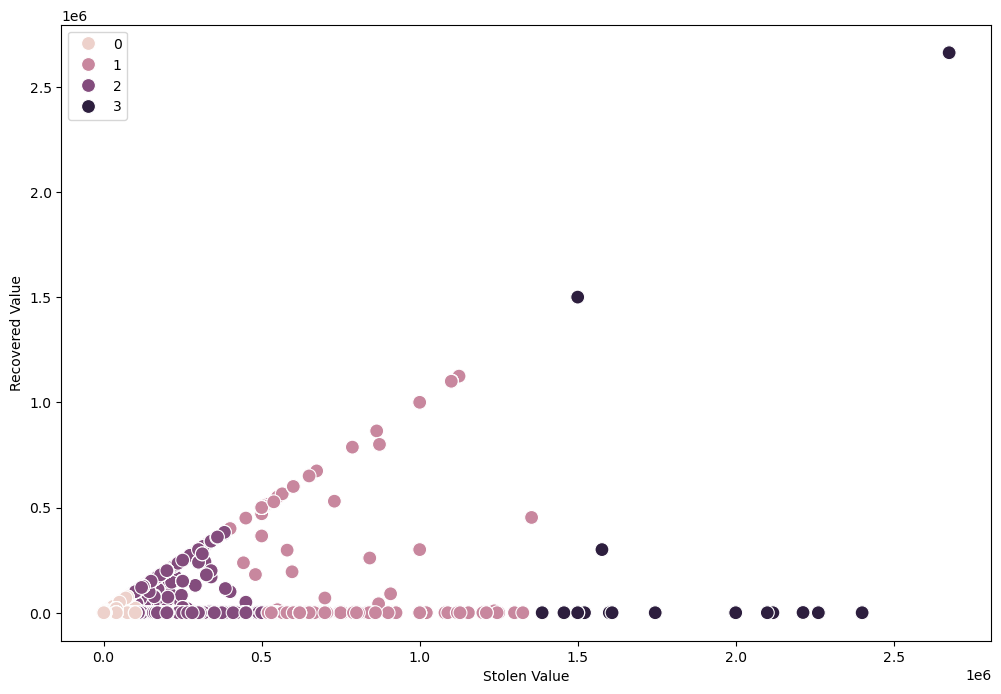

In [40]:
# Plot the clusters for the "stolen_value" and "recovered_value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=unsupervised_df_2['stolen_value'], y=unsupervised_df_2['recovered_value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Stolen Value') # Label x-axis.
plt.ylabel('Recovered Value') # Label y-axis.
plt.show()

## Analysis.
The clusters seem to align themselves with the stolen value.
There does not seem to be a lot of overlap between stolen amounts indicating the is the oly variable that is impacting the clustering.

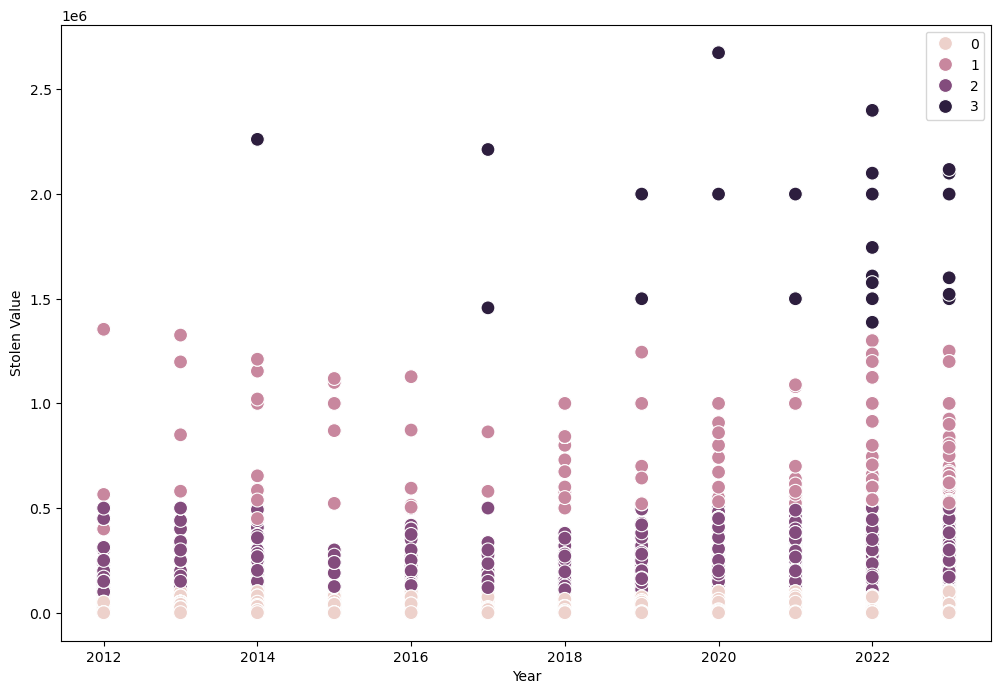

In [43]:
# Plot the clusters for the "Year" and "stolen_value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=unsupervised_df_2['data_year'], y=unsupervised_df_2['stolen_value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Stolen Value') # Label y-axis.
plt.show()

In [45]:
# again it looks like the data is segmenting itself by stolen value
# However there is slightly more overlap with cluster number 3

# Question 7. Create more visualizations
The dataset I have is not ideal for visualizations. There are essentially only two numerical values, the stolen and recovered value
The 1|0 variables are good for logistic analysis so a scatterplot is not appropriate
When I tried to see if stolen value was related to if this was a car, Python gave me an error.

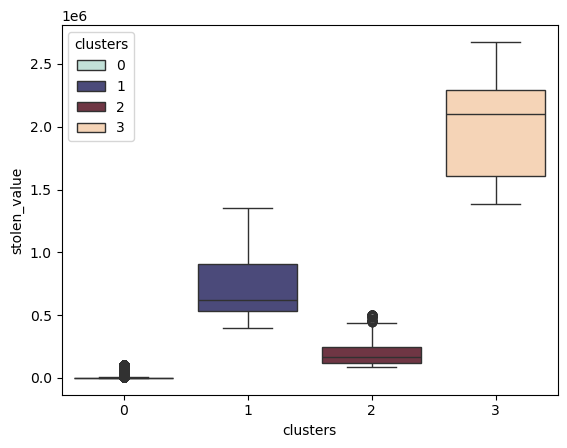

In [54]:
kmeans_box = sns.boxplot(
    data=unsupervised_df_2, 
    x='clusters', 
    y='stolen_value', 
    hue='clusters', 
    palette='icefire'
    
    
)
plt.show()

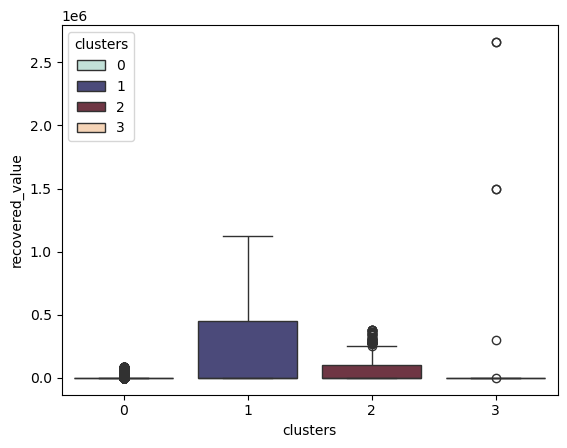

In [56]:
kmeans_box_recovered = sns.boxplot(
    data=unsupervised_df_2, 
    x='clusters', 
    y='recovered_value', 
    hue='clusters', 
    palette='icefire'
    
    
)
plt.show()

## Q8 Do the clusters make sense
Since I am not able to make scatter plots, I at least wanted to show the different stolen value ranges based on clusters.
It looks like clusters are indeed broken out by stolen value from low to high.
The returned value is also broken into low and high groups. 
As with previous analyses, the fact that some items were not returned is likely impacting the results, and the data should likely be segmented into
returned or not returned and below 1800, which represents 75% of the data, and above 1800.

## Q9 Calculate descriptive statistic with averages

In [59]:
unsupervised_df_2.groupby('clusters').agg({'stolen_value':['mean', 'median'], 
                         'recovered_value':['mean', 'median'], 
                         'data_year':['mean', 'median'],
                         'is_prop_desc_auto'	:['mean', 'median'], 
                         'is_prop_desc_other'	:['mean', 'median'], 
                        'is_prop_desc_money'	:['mean', 'median'], 
                          'is_florida'	:['mean', 'median'], 
                          'is_indv_victim'	:['mean', 'median'], 
                          'is_biz_victim'	:['mean', 'median'], 
                            'is_public_victim'	:['mean', 'median'], 
                          'is_prop_desc_money':['mean', 'median']})


stolen_value            recovered_value           data_year          \
                  mean     median            mean median         mean  median   
clusters                                                                        
0         3.855986e+03      307.0     1104.643052    0.0  2019.483228  2020.0   
1         7.270357e+05   620263.0   208128.972603    0.0  2020.181507  2022.0   
2         1.973291e+05   165000.0    44594.165025    0.0  2019.980788  2021.0   
3         2.012514e+06  2100000.0   215594.900000    0.0  2021.225000  2022.0   

         is_prop_desc_auto        is_prop_desc_other         \
                      mean median               mean median   
clusters                                                      
0                 0.078461    0.0           0.167249    0.0   
1                 0.041096    0.0           0.150685    0.0   
2                 0.114286    0.0           0.126601    0.0   
3                 0.000000    0.0           0.275000    0.0   

         is_prop_desc_money        is_florida        is_indv_victim         \
                       mean median       mean median           mean median   
clusters                                                                     
0                  0.116687    0.0   0.028852    0.0       0.716202    1.0   
1                  0.061644    0.0   0.229452    0.0       0.178082    0.0   
2                  0.049754    0.0   0.135961    0.0       0.265517    0.0   
3                  0.150000    0.0   0.125000    0.0       0.025000    0.0   

         is_biz_victim        is_public_victim         
                  mean median             mean median  
clusters                                               
0             0.236186    0.0         0.028447    0.0  
1             0.736301    1.0         0.054795    0.0  
2             0.697537    1.0         0.011330    0.0  
3             0.950000    1.0         0.000000    0.0

## Q10 Results and Future Steps
The unsupervised machine learning did not push the analysis forward as I had hoped.
It seems as though there is a cluster of stolen goods where something is impacting the stolen and the return value
However, additional analysis will need to be done to determine what the factor is.

The descriptive statistics  indicate the property type and victim type (business or individual) impact what was stolen and how much the item was worth. For example,  groups 1 through 3 are mostly business victims with a high stolen value, while group 0 is individuals with a low stolen value. I hope to pursue this line of inquiry further in my final project.

Further Questions
- It seems like a lot of the objects stolen are from a business. What are the most common items stolen and does their value impact if they items will be returned
- What is the range of stolen value by property type
- What is the range of stolen values by victim type
- What property types are more likely to be returned
- Can property types be segmented into smaller categories for analysis? For example, could I group all vehicles together to see how that type varies by victim and worth from other property types? 